# Aygaz Image Processing Bootcamp Project

## Importing Dependincies

- Importing needed libraries 

In [259]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from keras.layers import Input
from sklearn.model_selection import train_test_split

## Loading the Dataset.

In [36]:
# Selecting first 650 picture of the every class.

class_names = [x for x in os.listdir("D:\Aygaz\AygazBootcampProject1\dataset") ] # Listing class' names
class_names


['collie',
 'dolphin',
 'elephant',
 'fox',
 'giant+panda',
 'moose',
 'polar+bear',
 'rabbit',
 'sheep',
 'squirrel']

- Reading, Resizing and normalizing images and saving them into a dictionary with shape {class_name : list of image pixels}.
- resize to 128x128 size because we have normal size dataset and this size is the best for speed of input layer perfomance.

In [69]:
images_and_classes = {}

for class_name in class_names:
    images = []
    for x in range(1, 651):
        image = cv2.imread(f"./dataset/{class_name}/{class_name}_{10000 + x}.jpg")
       
        image_resized = cv2.resize(image, (128, 128))
        image_normalized = image_resized/255.0
        images.append(image_normalized)
    
    images_and_classes.update({f'{class_name}': images})

len(images)

650

### Creating Dataframe.

In [66]:
df = pd.DataFrame(columns=["image", "class"]) # Dataframe that has 1 feature and 1 class.

In [ ]:
x = 0
for key in images_and_classes.keys():
    for value in images_and_classes[key]:
        df.loc[x] = {"image": value, "class": key}
        x += 1

df["class"].value_counts() # Showing values.

class
collie         650
dolphin        650
elephant       650
fox            650
giant+panda    650
moose          650
polar+bear     650
rabbit         650
sheep          650
squirrel       650
Name: count, dtype: int64

In [90]:
df.head() # Showing first 5 element of the dataframe.

,image,class
0,"[[[0.11372549019607843, 0.25098039215686274, 0...",collie
1,"[[[0.27450980392156865, 0.2549019607843137, 0....",collie
2,"[[[0.09803921568627451, 0.0784313725490196, 0....",collie
3,"[[[0.0, 0.41568627450980394, 0.215686274509803...",collie
4,"[[[0.1450980392156863, 0.19607843137254902, 0....",collie


## Model Training

- Our model will be TF CNN with Logistic Regression.



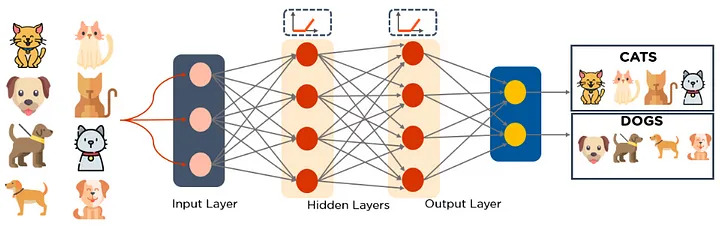

In [94]:
Image(filename='./imgs/img1.jpg')

- 3 Layers for that: Input Layer, Hidden Layer, Output Layer

- Input Layer : The layer to which we send the data to the neural network. No changes are made to the input data in this layer, and the values ​​of the input observations entered are transferred to the next layer, which is the Hidden Layer.

- Hidden Layer : The learning process takes place in this layer. The information received is processed here.

- Output Layer : It is where the desired information to be learned by the neural networks based on the input data and the comparison of the learned value is made. Once the operations here are completed, the result of this process appears in the output layer.

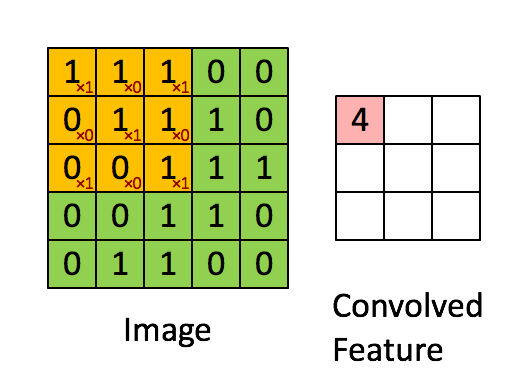

In [101]:
Image(filename='./imgs/gif1.gif')

- Pooling Layer: It is used to reduce the size of the image without losing its features. Typically, operations such as maximum pooling or average pooling are used to preserve the most significant features. This way, for example, if there is a large image, the number of pixels is reduced. It is used to speed up the process by reducing computational complexity. Features are preserved in the pooling layer, the size is reduced, and there is no loss of information.

- Flattening Layer: It performs the process of resizing the incoming data and preparing the data for the neural network. The matrix is ​​converted into a vector.

- Fully-Connected Layer: This is the step where the artificial neural network model is created.



### Label Encoding for target.

- Turning the object value type into int for tf model

In [242]:
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df["class"].value_counts()

class
0    650
1    650
2    650
3    650
4    650
5    650
6    650
7    650
8    650
9    650
Name: count, dtype: int64

### Splitting the data into sets.

In [243]:
X = np.stack(df["image"].values) # Features
y = df["class"] # Labels

In [244]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) 

In [260]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

### Creating Model

- For Hidden Layers: 
 > 1. You should use ReLU.
 > 2. ReLU is suitable for modeling non-linear relationships in hidden layers and preventing gradient vanishing.
- For Output Layer:
 > 1. You should use Softmax.
 > 2. Since you have 10 animal classes, Softmax is ideal for assigning a probability to each class and selecting the one with the highest probability.
 > 3. In your output layer, the number of neurons should be equal to the number of classes (10), and Softmax will normalize the probabilities among these classes.

- Why Should ReLU and Softmax Be Used Together?
> 1. It's important to note that ReLU and Softmax are not alternatives to each other.

> 2. ReLU enhances the learning capacity of the model in hidden layers.
> 3. Softmax makes the model's output meaningful for classification problems.

In [261]:
model = tf.keras.models.Sequential([
    Input(shape=(128,128,3)),  
    tf.keras.layers.Conv2D(16,3, padding="same",activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32,3, padding="same",activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64,3, padding="same",activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [262]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [263]:
history=model.fit(X_train,y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
143/143 [==============================] - 11s 69ms/step - loss: 1.7867 - accuracy: 0.3547 - val_loss: 1.5135 - val_accuracy: 0.4662
Epoch 2/15
143/143 [==============================] - 9s 66ms/step - loss: 1.3277 - accuracy: 0.5347 - val_loss: 1.3094 - val_accuracy: 0.5621
Epoch 3/15
143/143 [==============================] - 10s 67ms/step - loss: 1.0665 - accuracy: 0.6297 - val_loss: 1.2468 - val_accuracy: 0.5836
Epoch 4/15
143/143 [==============================] - 9s 66ms/step - loss: 0.8612 - accuracy: 0.7062 - val_loss: 1.2632 - val_accuracy: 0.5903
Epoch 5/15
143/143 [==============================] - 9s 63ms/step - loss: 0.6539 - accuracy: 0.7811 - val_loss: 1.2827 - val_accuracy: 0.5821
Epoch 6/15
143/143 [==============================] - 10s 67ms/step - loss: 0.4359 - accuracy: 0.8543 - val_loss: 1.5236 - val_accuracy: 0.5815
Epoch 7/15
143/143 [==============================] - 9s 63ms/step - loss: 0.2912 - accuracy: 0.9068 - val_loss: 1.8336 - val_accuracy: 0.5

In [265]:
# Evaluating Test Accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

61/61 [==============================] - 1s 15ms/step - loss: 2.8515 - accuracy: 0.5697
Test Accuracy: 56.97%


## Getting Manipulated Images

- Make images brighter

In [267]:
def manipulate_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=1.5, beta=30) 
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

X_test_manipulated = manipulate_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipulated Test Accuracy: {manipulated_accuracy * 100:.2f}%")

61/61 [==============================] - 1s 15ms/step - loss: 402.5555 - accuracy: 0.0969
Manipulated Test Accuracy: 9.69%


### Gray World Algorithm Manipulation

In [268]:
def apply_gray_world(image):
    avg_b, avg_g, avg_r = cv2.mean(image)[:3]
    gray_value = (avg_b + avg_g + avg_r) / 3
    scaling_factors = np.array([gray_value / avg_b, gray_value / avg_g, gray_value / avg_r])
    corrected_image = image * scaling_factors 
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image

X_test_corrected = np.array([apply_gray_world(img) for img in X_test_manipulated])

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Test Accuracy with Gray Scale: {corrected_accuracy * 100:.2f}%")

61/61 [==============================] - 1s 15ms/step - loss: 395.0490 - accuracy: 0.0969
Test Accuracy with Gray Scale: 9.69%


In [269]:
print("Results:") 
print(f"Original Test Set Accuracy: {test_accuracy * 100:.2f}%") 
print(f"Manipulated Test Set Accuracy: {manipulated_accuracy * 100:.2f}%") 
print(f"Color-Corrected Test Set Accuracy: {corrected_accuracy * 100:.2f}%")

Results:
Original Test Set Accuracy: 56.97%
Manipulated Test Set Accuracy: 9.69%
Color-Corrected Test Set Accuracy: 9.69%
